<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Universidad_Industrial_de_Santander_logo.svg/2560px-Universidad_Industrial_de_Santander_logo.svg.png" width=180 title="Taller#1 Estadística Descriptiva">





#**Proyecto: Análisis y Predicción del Rendimiento Académico en Estudiantes Universitarios a partir de Patrones de Sueño y Estrés**








**Estudiante:** Juan David Lopez Ruiz

**Codigo:** 2180645



**Profesora:** Santiago Gomez


**IA1 || Grupo C1**


**Escuela de Ingeniería de Sistemas e Informática**


In [ ]:

#@title **Librerias** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme()
print("Librerias Cargadas")

Librerias Cargadas


In [ ]:
#@title **Montar Drive** { display-mode: "form" }
import os
from google.colab import drive

Nombre_Carpeta = "Proyecto_IA1" #@param {type:"string"}
path = "/content/drive/My Drive/" + Nombre_Carpeta
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto_IA1


In [ ]:
# Cargar dataset
df = pd.read_csv("Student_Insomnia_and_Educational_Outcomes_Dataset.csv")  # reemplazar con el nombre real del archivo

# Vista general
print("Dimensiones del dataset:", df.shape)
df.head()




Dimensiones del dataset: (996, 16)


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [ ]:
rename_dict = {
    "1. What is your year of study?": "year_of_study",
    "2. What is your gender?": "gender",
    "3. How often do you have difficulty falling asleep at night? ": "difficulty_falling_asleep",
    "4. On average, how many hours of sleep do you get on a typical day?": "sleep_hours",
    "5. How often do you wake up during the night and have trouble falling back asleep?": "night_awakenings",
    "6. How would you rate the overall quality of your sleep?": "sleep_quality",
    "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?": "concentration_difficulty",
    "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?": "daytime_fatigue",
    "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?": "miss_classes_sleep",
    "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?": "impact_on_assignments",
    "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?": "device_usage_before_sleep",
    "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?": "caffeine_consumption",
    "13. How often do you engage in physical activity or exercise?": "physical_activity",
    "14. How would you describe your stress levels related to academic workload?": "academic_stress",
    "15. How would you rate your overall academic performance (GPA or grades) in the past semester?": "academic_performance"
}

df.rename(columns=rename_dict, inplace=True)



In [ ]:
# Información general
df.info()

# Estadísticas básicas
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  996 non-null    object
 1   year_of_study              996 non-null    object
 2   gender                     996 non-null    object
 3   difficulty_falling_asleep  996 non-null    object
 4   sleep_hours                996 non-null    object
 5   night_awakenings           996 non-null    object
 6   sleep_quality              996 non-null    object
 7   concentration_difficulty   996 non-null    object
 8   daytime_fatigue            996 non-null    object
 9   miss_classes_sleep         996 non-null    object
 10  impact_on_assignments      996 non-null    object
 11  device_usage_before_sleep  996 non-null    object
 12  caffeine_consumption       996 non-null    object
 13  physical_activity          996 non-null    object
 14  academic_s

,Timestamp,year_of_study,gender,difficulty_falling_asleep,sleep_hours,night_awakenings,sleep_quality,concentration_difficulty,daytime_fatigue,miss_classes_sleep,impact_on_assignments,device_usage_before_sleep,caffeine_consumption,physical_activity,academic_stress,academic_performance
count,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996
unique,993,4,2,5,5,5,5,5,5,5,5,5,5,5,4,5
top,12/15/2024 6:06:05,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very poor,Often,Often,Often (3-4 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),Extremely high stress,Poor
freq,2,481,691,446,508,491,290,501,470,518,475,508,500,453,490,491


In [ ]:
# Ver todas las columnas
print(df.columns)




Index(['Timestamp', 'year_of_study', 'gender', 'difficulty_falling_asleep',
       'sleep_hours', 'night_awakenings', 'sleep_quality',
       'concentration_difficulty', 'daytime_fatigue', 'miss_classes_sleep',
       'impact_on_assignments', 'device_usage_before_sleep',
       'caffeine_consumption', 'physical_activity', 'academic_stress',
       'academic_performance'],
      dtype='object')


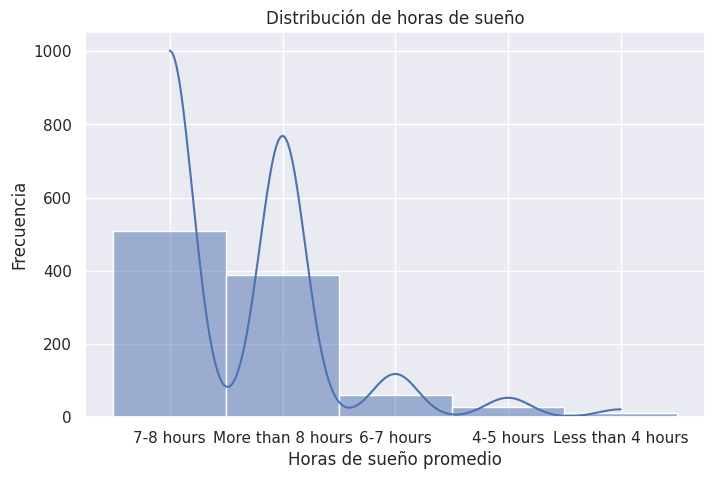

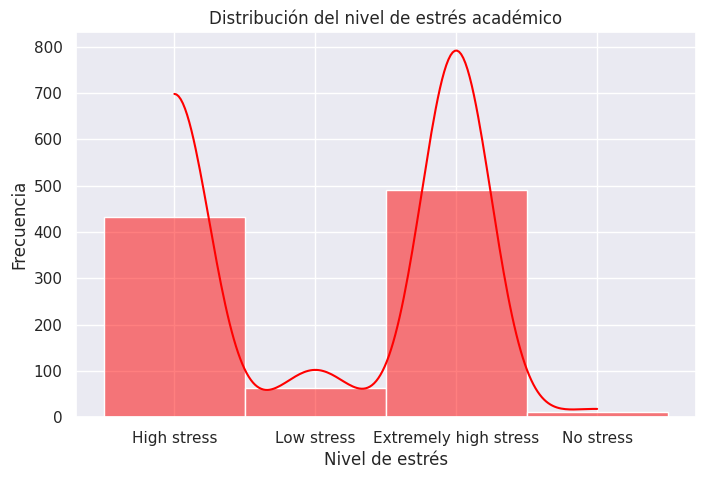

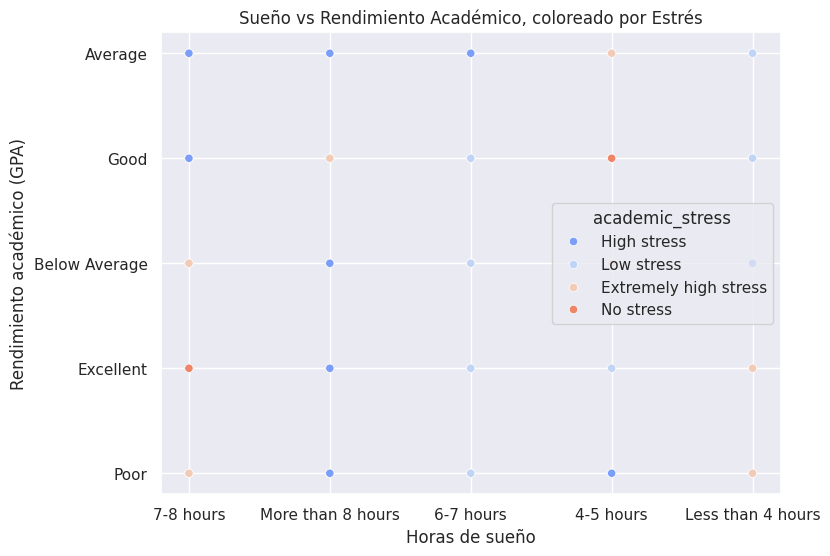

In [ ]:
# ===============================
# 3. EXPLORATORY DATA ANALYSIS
# ===============================

# Distribución de horas de sueño
plt.figure(figsize=(8,5))
sns.histplot(df["sleep_hours"], kde=True, bins=20)
plt.title("Distribución de horas de sueño")
plt.xlabel("Horas de sueño promedio")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del estrés académico
plt.figure(figsize=(8,5))
sns.histplot(df["academic_stress"], kde=True, bins=20, color="red")
plt.title("Distribución del nivel de estrés académico")
plt.xlabel("Nivel de estrés")
plt.ylabel("Frecuencia")
plt.show()

# Correlación entre horas de sueño y rendimiento académico
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="sleep_hours",
    y="academic_performance",
    hue="academic_stress",
    data=df,
    palette="coolwarm"
)
plt.title("Sueño vs Rendimiento Académico, coloreado por Estrés")
plt.xlabel("Horas de sueño")
plt.ylabel("Rendimiento académico (GPA)")
plt.show()


